<font size=6 face="微软雅黑">**Almost Exact simulation of the 3/2 model**</font>

Different from Baldeaux ([2012](https://doi.org/10.1142/S021902491250032X)), we use an almost exact way to calculate the option price under the 3/2 model. The dynamics of the stock price under the 3/2 model under the risk-neutral measure are given by

$$
 \frac{dS_t}{S_t} = rdt + \sqrt{V_t}\rho dW_t^1 + \sqrt{V_t}\sqrt{1-\rho^2}dW_t^2 \tag{1}
$$

$$
 dV_t = \kappa V_t (\theta - V_t)dt + \epsilon V_t^{3/2}dW_t^1 \tag{2}
$$

where $W_t^1$ and $W_t^2$ are independent Brownian motions. Regarding the parameters, $r$ represents the constant interest rate, $\rho$ the instantaneous correlation between the return on the stock and the variance process and $\epsilon$ governs the volatility of volatility. The speed of mean reversion is given by $\kappa V_t$ and $\theta$ denotes the long-run mean of the variance process.

Defining $X_t = \frac{1}{V_t}$, we obtain

$$
dX_t = (\kappa + \epsilon^2 - \kappa\theta X_t)dt - \epsilon \sqrt{X_t}dW_t^1 \tag{3}
$$



# Part 1: Almost Exact MC Method:

## Step 1): Simulating $X_T$

$X_T$ is distributed as a noncentral $ \chi^2 $ distribution

$$
\frac{X_T{\rm exp}\lbrace \kappa \theta T \rbrace}{c(T)} \sim \chi^2(\delta, \alpha)
$$

where
$$
\delta = \frac{4(\kappa + \epsilon^2)}{\epsilon^2}, \quad \alpha = \frac{X_0}{c(T)}, \quad c(T) = \frac{\epsilon^2({\rm exp}\lbrace \kappa\theta T \rbrace - 1)}{4\kappa\theta}
$$

## Step 2): Simulating $\int_0^T \frac{ds}{X_s}$ Given $X_T$

Let $X_t$ be given by Eq. (3), then the Laplace transform of the conditional distribution of $\int_0^t \frac{ds}{X_s}|X_t$ is

$$
E\left({\rm exp}\left\lbrace -a^* \int_0^t \frac{ds}{X_s} \ \bigg| \ X_t \right\rbrace \right) = \frac{I_{\sqrt{\nu^2+8a^*/\epsilon^2}}\left(-\frac{2\kappa\theta\sqrt{X_tX_0}}{\epsilon^2{\rm sinh}\left(-\frac{\kappa\theta t}{2}\right)}\right)}{I_{\nu}\left(-\frac{2\kappa\theta\sqrt{X_tX_0}}{\epsilon^2{\rm sinh}\left(-\frac{\kappa\theta t}{2}\right)}\right)}
$$


where $I_{\nu}(z)$ denotes the modified Bessel function of the first kind, $\delta = \frac{4(\kappa + \epsilon^2)}{\epsilon^2}$ and $\nu = \frac{\delta}{2} - 1$. By setting $a^* = -ia$ we obtain the characteristic function $\Phi(a)$

The characteristic function of $\int_0^t \frac{ds}{X_s}|X_t$ is

$$
\Phi(a) = E\left({\rm exp}\left\lbrace ia \int_0^t \frac{ds}{X_s} \ \bigg| \ X_t \right\rbrace \right) = \frac{I_{\sqrt{\nu^2-8ia/\epsilon^2}}\left(-\frac{2\kappa\theta\sqrt{X_tX_0}}{\epsilon^2{\rm sinh}\left(-\frac{\kappa\theta t}{2}\right)}\right)}{I_{\nu}\left(-\frac{2\kappa\theta\sqrt{X_tX_0}}{\epsilon^2{\rm sinh}\left(-\frac{\kappa\theta t}{2}\right)}\right)}
$$

## Step 3):  Approximate the Distribution of $V_T$  $:= \frac{1}{X_T}$

Approximate $V_T$ with Log-normal distribution by matching the first and second moment $E(V_T|v_T)$, $E(V_T^2|v_T)$, and we can get

$$ \mu = M_1,    \sigma = \sqrt \frac{M_2}{M_1^2}$$


## Step 4):  Calculate Option Price

The SDE in a de-correlated form:
$$dS_t = \sigma_t(\rho dZ_t+\sqrt{1-\rho^2}dX_t),   with dX_tdZ_t=0.$$

Randomly picking a path given $V_T$, and we can get $ \int_0^T\sigma_t^2dt$

Under normal model ($\beta=0$): 

$$S_T=S_0+\frac{\rho}{\epsilon}(X_T-X_0-k\theta T+(k+\frac{1}{2}\epsilon^2)\int_0^T\sigma_t^2dt)+\sqrt{(1-\rho^2)V_T}X_1$$

and the option price is from the normal model:

$$C_N(K,S_0:=S_0+\frac{\rho}{\epsilon}(X_T-X_0-k\theta T+(k+\frac{1}{2}\epsilon^2)\int_0^T\sigma_t^2dt, \sigma_N := \sqrt{(1-\rho^2)V_T/T}  )$$

Under BSM model ($\beta=1$): 

$$log(\frac{S_T}{S_0})=\frac{\rho}{\epsilon}(log(\frac{X_0}{X_T})-k(\theta T-(1+\frac{\epsilon^2}{2k})V_T))-\frac{1}{2}V_T+\sqrt{(1-\rho^2)V_T}X_1$$

And the option price is from the BSM formula:

$$C_{BS}(K,S_0e^{\frac{\rho}{\epsilon}(log(\frac{X_0}{X_T})-k(\theta T-(1+\frac{\epsilon^2}{2k})V_T))-\frac{\rho^2}{2}I_T},\sqrt{(1-\rho^2)V_T/T})$$
Furthermore, we consider three versions of almost exact MC:

Version 1: Use abs() remediation on moments calculation

Version 2: With $M1$ as the simulation of $U_T$


# Part 2: Numerical Tests:

Before the test, we first load our own version of AEMC on the 3/2 option pricing model and some third-party modules.

In [1]:
import sys
sys.path.insert(0, 'E:\研究生课程\研二下学期\应用随机过程\Finalproject\local\PyFENG')
sys.path.insert(0, 'D:/我的文档/在校用的/20212/ASP/Final_Project/PyFeng')
import pyfeng as pf
pf

<module 'pyfeng' from 'D:/我的文档/在校用的/20212/ASP/Final_Project/PyFeng\\pyfeng\\__init__.py'>

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In part 2, we mainly have two tasks.

First, we do several numerical tests, which have been given results in the paper of Exact MC in 3/2 option pricing model.

Second, we will draw the implied volatility surface in the best Case.

## Numerical Tests in the cases of past papers.

Here are the parameters for these cases.

Baldeaux ([2012](https://doi.org/10.1142/S021902491250032X)) chooses the following set of parameters and gives the reference option price **0.443059** (Case I)

| Parameters | $$S_0$$ | $$K$$ | $$\kappa$$ | $$\theta$$ | $$\epsilon$$ | $$\rho$$ | $$V_0$$ | $$r$$ | $$T$$ |Reference option price|
|:- - - |:- - - |:- - - |:- - - |:- - - |:- - - |:- - - |:- - - |:- - - |:- - - |:- - - |
|Case I|1|1|2|1.5|0.2|-0.5|1|0.05|1|0.443059|

IRO RENE KOUARFATE, MICHAEL A. KOURITZIN, AND ANNE MACKAY (2020) choose the following parameters and calculate the exact price (Case II to Case V):

|Parameters|$$S_0$$|$$\kappa$$|$$\theta$$|$$\epsilon$$|$$\rho$$|$$V_0$$|$$r$$|$$T$$|
|:- - - |:- - - |:- - - |:- - - |:- - - |:- - - |:- - - |:- - - |:- - - |
|Case II|100|22.84|0.218|8.56|-0.99|0.06|0|0.5|
|Case III|100|18.32|0.218|8.56|-0.99|0.06|0|0.5|
|Case IV|100|19.76|0.218|3.2|-0.99|0.06|0|0.5|
|Case V|100|20.48|0.218|3.2|-0.99|0.06|0|0.5|

The exact prices of European call options under different $K$ will be as following:

|$$K/S_0$$| Case II | Case III | Case IV | Case V |
|: - - - |- - - -|- - - -|- - - -|- - - -|
|0.95|10.364|10.055|11.657|11.724|
|1|7.386|7.042|8.926|8.999|
|1.05|4.938|4.586|6.636|6.710|

### Case-I

Now, let's test for the first case.

| Parameters | $$S_0$$ | $$K$$ | $$\kappa$$ | $$\theta$$ | $$\epsilon$$ | $$\rho$$ | $$V_0$$ | $$r$$ | $$T$$ |Reference option price|
|:- - - |:- - - |:- - - |:- - - |:- - - |:- - - |:- - - |:- - - |:- - - |:- - - |:- - - |
|Case I|1|1|2|1.5|0.2|-0.5|1|0.05|1|0.443059|

In [3]:
aemc = pf.Sv32McAe(S0=1, Ks=1, T=1,r=0.05, sigma_0=1, beta=1, rho=-0.5, theta=1.5, kappa=2, vov=0.2, path_num = 1000, cp=1)
output1 = aemc.optionPrice_version1()
output2 = aemc.optionPrice_version2()

In [4]:
print('In version_1, the mean of prices is {}, and the std of prices is {}'.format(output1[0][0],output1[1][0]))
print('In version_2, the mean of prices is {}, and the std of prices is {}'.format(output2[0][0],output2[1][0]))
print('In BSM model, the price is {}'.format(aemc.BSM(S0=1, Ks=1, T=1,r=0.05, sigma=1,cp=1)))
print('In the paper of Exact MC in the 3/2 model, the price is {0:.6f}'.format(0.443059))

In version_1, the mean of prices is 59.454702495644646, and the std of prices is 109.90910665257033
In version_2, the mean of prices is 0.39006412115155387, and the std of prices is 0.3278558585296599
In BSM model, the price is 0.39840162483437175
In the paper of Exact MC in the 3/2 model, the price is 0.443059


In version-1, in which we follow the method exactly, we get a very odd result. However, in version-2, that we conduct innovation on, the outcome is much more reasonable.

### Case-II to Case-V

In Kouarfate, Kouritzin and Mackay (2020), these four cases have similar parameter combination. Hence, we decide to put these four cases together, in which beta all equals to 1.

|Parameters|$$S_0$$|$$\kappa$$|$$\theta$$|$$\epsilon$$|$$\rho$$|$$V_0$$|$$r$$|$$T$$|
|:- - - |:- - - |:- - - |:- - - |:- - - |:- - - |:- - - |:- - - |:- - - |
|Case II|100|22.84|0.218|8.56|-0.99|0.06|0|0.5|
|Case III|100|18.32|0.218|8.56|-0.99|0.06|0|0.5|
|Case IV|100|19.76|0.218|3.2|-0.99|0.06|0|0.5|
|Case V|100|20.48|0.218|3.2|-0.99|0.06|0|0.5|


|$$K/S_0$$| Case II | Case III | Case IV | Case V |
|: - - - |- - - -|- - - -|- - - -|- - - -|
|0.95|10.364|10.055|11.657|11.724|
|1|7.386|7.042|8.926|8.999|
|1.05|4.938|4.586|6.636|6.710|


First, let us assign all the parameters.

In [5]:
S0=100
Ks = np.array([95,100,105])
theta = 0.218
rho = -0.99
sigma = np.sqrt(0.06)
r = 0
T = 0.5
kappas = np.array([22.84, 18.32, 19.76, 20.48])
vovs = np.array([8.56, 8.56, 3.2, 3.2])

In [6]:
table_for_version1 = pd.DataFrame(index = [0.95,1,1.05], columns = ['Case II', 'Case III', 'Case IV', 'Case V'])
table_for_version2 = pd.DataFrame(index = [0.95,1,1.05], columns = ['Case II', 'Case III', 'Case IV', 'Case V'])
table_for_version1_std = pd.DataFrame(index = [0.95,1,1.05], columns = ['Case II', 'Case III', 'Case IV', 'Case V'])
table_for_version2_std = pd.DataFrame(index = [0.95,1,1.05], columns = ['Case II', 'Case III', 'Case IV', 'Case V'])
table_for_EMC = pd.DataFrame(np.array([[10.364,10.055,11.657,11.724],[7.386,7.042,8.926,8.999],[4.938,4.586,6.636,6.710]]),
                             index = [0.95,1,1.05], columns = ['Case II', 'Case III', 'Case IV', 'Case V'])

In [7]:
for i in range(4):
    aemc = pf.Sv32McAe(S0, Ks, T=T,r=r, sigma_0=sigma, beta=1, rho=rho, theta=theta, kappa=kappas[i], vov=vovs[i], path_num = 1000, cp=1)
    output1 = aemc.optionPrice_version1()
    output2 = aemc.optionPrice_version2()
    table_for_version1.iloc[:,i] = output1[0]
    table_for_version1_std.iloc[:,i] = output1[1]
    table_for_version2.iloc[:,i] = output2[0]
    table_for_version2_std.iloc[:,i] = output2[1]

In [8]:
table_for_BSM = pd.DataFrame(aemc.BSM(S0, Ks,r,T,sigma,cp=1),index = [0.95,1,1.05],columns = ['BSM'])

Now, let us look at the prices from AEMC, EMC, and BSM.

AEMC-version-1

In [9]:
table_for_version1

,Case II,Case III,Case IV,Case V
0.95,0.0,0.0,0.0,0.0
1.00,0.0,0.0,0.0,0.0
1.05,0.0,0.0,0.0,0.0


AEMC-version-2

In [10]:
table_for_version2

,Case II,Case III,Case IV,Case V
0.95,8.442156,8.419183,10.689396,10.447617
1.00,5.599538,5.488476,8.013633,7.718308
1.05,3.376049,3.293728,5.809503,5.497562


Exact MC

In [11]:
table_for_EMC

,Case II,Case III,Case IV,Case V
0.95,10.364,10.055,11.657,11.724
1.00,7.386,7.042,8.926,8.999
1.05,4.938,4.586,6.636,6.710


BSM model

In [12]:
table_for_BSM

,BSM
0.95,9.520830
1.00,6.901255
1.05,4.851830


From BSM model, we can see the prices are far away from EMC. Then we will not dig into BSM model
From two versions of AEMC, we can see that the prices in version-1 is unreliable, however, the version-2 is much closer to the results from EMC.

In [13]:
table_for_EMC - table_for_version2

,Case II,Case III,Case IV,Case V
0.95,1.921844,1.635817,0.967604,1.276383
1.00,1.786462,1.553524,0.912367,1.280692
1.05,1.561951,1.292272,0.826497,1.212438


We can see that in Case V of AEMC, the prices are closes to the prices in EMC. Hence, we draw implied volatility surface in Case V.

## Implied Volatility Surface in Case V

In this part, we willdraw implied volatility surface in Case V. The original parameters are.

|Parameters|$$S_0$$|$$\kappa$$|$$\theta$$|$$\epsilon$$|$$\rho$$|$$V_0$$|$$r$$|
|:- - - |:- - - |:- - - |:- - - |:- - - |:- - - |:- - - |:- - - |
|Case V|100|20.48|0.218|3.2|-0.99|0.06|0|

Implied Volatility Surface

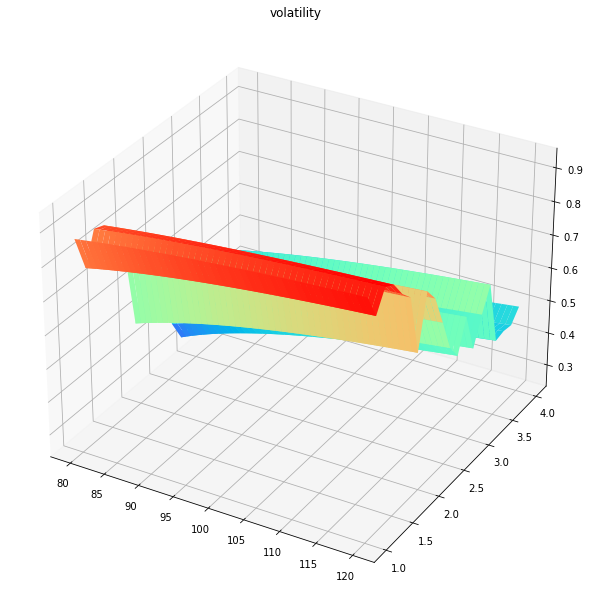

In [14]:
S0 = 100
Ks = np.linspace(80, 120, num=50, endpoint=True, retstep=False, dtype=None)
T = np.linspace(1, 4, num=20, endpoint=True, retstep=False, dtype=None)
Z = np.zeros([len(T),len(Ks)])
for idx,t in enumerate(T):
    aemc = pf.Sv32McAe(S0, Ks, t ,r=0.05, sigma_0=1, beta=1, rho=-0.5, theta=1.5, kappa=2, vov=0.2, path_num = 100, cp=1)
    aemc.optionPrice_version2()
    Z[idx,:] = aemc.impliedVolatility1()

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)
delta = 0.5
# 对x、y数据执行网格化
X, Y = np.meshgrid(Ks,T)

# 绘制3D图形
ax.plot_surface(X, Y, Z,
    rstride=1,  # rstride（row）指定行的跨度
    cstride=1,  # cstride(column)指定列的跨度
    cmap=plt.get_cmap('rainbow'))  # 设置颜色映射
# 设置Z轴范围
# ax.set_zlim(-2, 2)
# 设置标题
plt.title("volatility")
plt.show()

# Part 3: Analysis:

Strengths:

Compared with exact MC method, almost exact MC method is not that time-consuming. For exact MC method, the most time consuming step when sampling from the conditional distribution is the evaluation of the modified Bessel function of the first kind, $I_\nu(z)$, which has to be evaluated at **complex** $\nu$.Besides, drawing random from numerical CDF is also slow. However, for almost exact method, it supposes $V_T$ subjects to an easy and well-known distribution by matching fisrt and second moment, which saves much time.

Weaknesses:

Almost exact MC is also time-consuming compared with conditional MC. Besides, the outcome we get right now is not accurate. Maybe we need further analysis, e.g inverse gaussian.

# Part 4: References

[1] Kouarfate, I. R. , Kouritzin, M. A. , & Mackay, A. . (2020). Explicit solution simulation method for the 3/2 model. Papers.

[2] Jan Baldeaux. Exact simulation of the 3/2 model. International Journal of Theoretical and Applied Finance, 15(05):1250032, 2012. doi:10.1142/S021902491250032X. http://arxiv.org/abs/1105.3297.